In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyspedas
import pytplot
import plasma_params as pp
import compressional_B as cb
import calc_RI as cr
import ULF_duct_plot_detail as udp
import calc_integral_chorus as cic
import ULF_duct_plot_ver2 as udp2
import calc_stokes as cs
import calc_refractive_index as cri

In [5]:
tr =  ['2017-03-27 21:30:00', '2017-03-27 22:00:00']
'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)

31-Aug-23 15:59:43: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 15:59:44: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 15:59:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 15:59:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

31-Aug-23 15:59:44: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
31-Aug-23 15:59:44: File 

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 15:59:44: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 15:59:55: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 15:59:55: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 15:59:55: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 15:59:55: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 15:59:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 15:59:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 15:59:55: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


('delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec', False)

In [2]:
def calc_n1(gamma, beta, tr, f):
    'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
    B0 = pytplot.data_quants['B0']*1e-9
    B1 = pytplot.data_quants['delta_z']*1e-9
    theta = 15*np.pi/180
    n0 = 2*1e6
    gb = gamma*beta
    a = gb
    A = 1-a/2-((1+a/2)**2-2*a*np.cos(theta))**(1/2)
    n1 = 2*n0*B1/B0/A
    N = n0+n1
    B = B0+B1
    mu = np.zeros(len(B['time']))
    for i in range(len(B['time'])):
        mu[i] = cr.calc_RI(N[i], B[i], f)
    return n1, mu

In [3]:
def calc_n1_fast(gamma, beta, tr, f):
    'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
    B0 = pytplot.data_quants['B0']*1e-9
    B1 = pytplot.data_quants['delta_z']*1e-9
    theta = 30*np.pi/180
    n0 = 2*1e6
    gb = gamma*beta
    a = gb
    A = 1-a/2+((1+a/2)**2-2*a*np.cos(theta))**(1/2)
    n1 = 2*n0*B1/B0/A
    N = n0+n1
    B = B0+B1
    mu = np.zeros(len(B['time']))
    for i in range(len(B['time'])):
        mu[i] = cr.calc_RI(N[i], B[i], f)
    return n1, mu

In [4]:
""" pytplot.store_data('n1', data={'x': pytplot.data_quants['B0']['time'], 'y': n1})
pytplot.store_data('N', data={'x': pytplot.data_quants['B0']['time'], 'y': 2*1e6+n1}) """

" pytplot.store_data('n1', data={'x': pytplot.data_quants['B0']['time'], 'y': n1})\npytplot.store_data('N', data={'x': pytplot.data_quants['B0']['time'], 'y': 2*1e6+n1}) "

In [10]:
""" pytplot.tplot(['n1'
               ]) """

" pytplot.tplot(['n1'\n               ]) "

In [12]:
beta = [2, 3, 4, 5, 6, 7, 8, 9, 10]
tr =  ['2017-03-27 21:30:00', '2017-03-27 22:00:00']
'delta_z', 'delta_xy', 'erg_mgf_l2_magt_8sec','B0' == cb.compressional_B(tr)
gamma = 5/3
f = 400


for i in range(len(beta)):
    mu = calc_n1(gamma, beta[i], tr, f)
    pytplot.store_data('mu_'+str(beta[i]), data={'x':pytplot.data_quants['B0']['time'], 'y':mu})


""" 
pytplot.store_data('mu_all', data = ['mu_'+str(beta[i]) for i in range(len(beta))])
pytplot.options('mu_all', opt_dict={'ytitle': 'refractive index'}) """

31-Aug-23 16:09:57: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:09:58: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:09:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:09:59: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0

31-Aug-23 16:09:59: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:09:59: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:09:59: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:09:59: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:10:10: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:10:10: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:10:10: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:10:10: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:10:10: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:10:10: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:10:10: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:10:27: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:10:28: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:10:28: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:10:29: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:10:29: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:10:29: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:10:40: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:10:40: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:10:40: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:10:40: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:10:40: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:10:40: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:10:40: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:11:20: mu_2: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:11:20: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:11:21: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:11:21: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:11:21: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:11:21: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:11:21: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:11:32: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:11:32: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:11:32: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:11:32: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:11:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:11:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:11:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:12:13: mu_3: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:12:13: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:12:13: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:12:13: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:12:13: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:12:13: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:12:14: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:12:24: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:12:24: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:12:24: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:12:24: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:12:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:12:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:12:24: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:13:05: mu_4: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:13:05: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:13:05: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:13:05: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:13:06: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:13:06: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:13:06: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:13:17: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:13:17: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:13:17: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:13:17: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:13:17: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:13:17: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:13:17: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:13:58: mu_5: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:13:58: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:13:58: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:13:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:13:58: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:13:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:13:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:14:09: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:14:09: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:14:09: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:14:09: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:14:09: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:14:09: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:14:09: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:14:50: mu_6: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:14:50: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:14:50: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:14:50: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:14:51: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:14:51: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:14:51: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:15:01: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:15:01: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:15:01: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:15:01: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:15:01: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:15:01: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:15:01: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:15:41: mu_7: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:15:41: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:15:41: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:15:41: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:15:42: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:15:42: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:15:42: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:15:52: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:15:52: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:15:52: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:15:52: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:15:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:15:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:15:52: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:16:31: mu_8: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:16:31: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:16:31: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:16:31: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:16:32: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:16:32: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:16:32: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:16:42: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:16:42: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:16:42: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:16:42: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:16:42: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:16:42: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:16:42: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:17:21: mu_9: lengths of x (14401) and y (2) do not match!
31-Aug-23 16:17:21: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
31-Aug-23 16:17:21: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
31-Aug-23 16:17:21: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elemen

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:17:22: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
31-Aug-23 16:17:22: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

31-Aug-23 16:17:22: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


31-Aug-23 16:17:32: tinterpol (linear) was applied to: cos_th_intpl
31-Aug-23 16:17:32: tinterpol (linear) was applied to: sin_th_intpl
31-Aug-23 16:17:32: tinterpol (linear) was applied to: cos_ph_intpl
31-Aug-23 16:17:32: tinterpol (linear) was applied to: sin_ph_intpl
31-Aug-23 16:17:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
31-Aug-23 16:17:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
31-Aug-23 16:17:32: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
31-Aug-23 16:18:11: mu_10: lengths of x (14401) and y (2) do not match!


" \npytplot.store_data('mu_all', data = ['mu_'+str(beta[i]) for i in range(len(beta))])\npytplot.options('mu_all', opt_dict={'ytitle': 'refractive index'}) "

In [5]:
tr =  ['2017-03-27 21:30:00', '2017-03-27 22:00:00']


In [35]:
n1, mu320 = calc_n1(5/3, 1.8, tr, 320)
n1, mu384 = calc_n1(5/3, 1.8, tr, 384)
n1, mu448 = calc_n1(5/3, 1.8, tr, 448)
#pytplot.store_data('mu_4', data={'x':pytplot.data_quants['B0']['time'], 'y':mu})

11-Sep-23 15:23:06: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
11-Sep-23 15:23:06: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
11-Sep-23 15:23:06: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


11-Sep-23 15:23:07: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
11-Sep-23 15:23:07: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

11-Sep-23 15:23:07: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


11-Sep-23 15:23:19: tinterpol (linear) was applied to: cos_th_intpl
11-Sep-23 15:23:19: tinterpol (linear) was applied to: sin_th_intpl
11-Sep-23 15:23:19: tinterpol (linear) was applied to: cos_ph_intpl
11-Sep-23 15:23:19: tinterpol (linear) was applied to: sin_ph_intpl
11-Sep-23 15:23:19: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
11-Sep-23 15:23:19: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
11-Sep-23 15:23:19: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
11-Sep-23 15:24:01: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
11-Sep-23 15:24:02: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
11-Sep-23 15:24:02: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


11-Sep-23 15:24:03: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
11-Sep-23 15:24:03: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

11-Sep-23 15:24:03: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


11-Sep-23 15:24:14: tinterpol (linear) was applied to: cos_th_intpl
11-Sep-23 15:24:14: tinterpol (linear) was applied to: sin_th_intpl
11-Sep-23 15:24:14: tinterpol (linear) was applied to: cos_ph_intpl
11-Sep-23 15:24:14: tinterpol (linear) was applied to: sin_ph_intpl
11-Sep-23 15:24:14: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
11-Sep-23 15:24:14: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
11-Sep-23 15:24:14: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl
11-Sep-23 15:24:57: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
11-Sep-23 15:24:58: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
11-Sep-23 15:24:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wi

 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


11-Sep-23 15:24:58: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
11-Sep-23 15:24:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

11-Sep-23 15:24:58: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


11-Sep-23 15:25:10: tinterpol (linear) was applied to: cos_th_intpl
11-Sep-23 15:25:10: tinterpol (linear) was applied to: sin_th_intpl
11-Sep-23 15:25:10: tinterpol (linear) was applied to: cos_ph_intpl
11-Sep-23 15:25:10: tinterpol (linear) was applied to: sin_ph_intpl
11-Sep-23 15:25:10: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
11-Sep-23 15:25:10: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
11-Sep-23 15:25:10: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


In [36]:
pytplot.store_data('mu_320', data={'x':pytplot.data_quants['B0']['time'], 'y':mu320})
pytplot.store_data('mu_384', data={'x':pytplot.data_quants['B0']['time'], 'y':mu384})
pytplot.store_data('mu_448', data={'x':pytplot.data_quants['B0']['time'], 'y':mu448})


True

In [164]:
f=400
NN = 2*1e6
BB = pytplot.data_quants['erg_mgf_l2_magt_8sec']*1e-9
mu_0320 = cr.calc_RI(NN, BB, 320)
mu_0384 = cr.calc_RI(NN, BB, 384)
mu_0448 = cr.calc_RI(NN, BB, 448)
pytplot.store_data('mu_0320', data={'x':pytplot.data_quants['erg_mgf_l2_magt_8sec']['time'], 'y':mu_0320})
pytplot.store_data('mu_0384', data={'x':pytplot.data_quants['erg_mgf_l2_magt_8sec']['time'], 'y':mu_0384})
pytplot.store_data('mu_0448', data={'x':pytplot.data_quants['erg_mgf_l2_magt_8sec']['time'], 'y':mu_0448})
pytplot.options('mu_0320', opt_dict={'line_style': '--'})

pytplot.store_data('mu_320mix', data = ['mu_0320', 'mu_320'])
pytplot.store_data('mu_384mix', data = ['mu_0384', 'mu_384'])
pytplot.store_data('mu_448mix', data = ['mu_0448', 'mu_448'])
pytplot.options('mu_320mix', opt_dict={'ytitle': 'refractive index'})
pytplot.options('mu_384mix', opt_dict={'ytitle': 'refractive index'})
pytplot.options('mu_448mix', opt_dict={'ytitle': 'refractive index'})


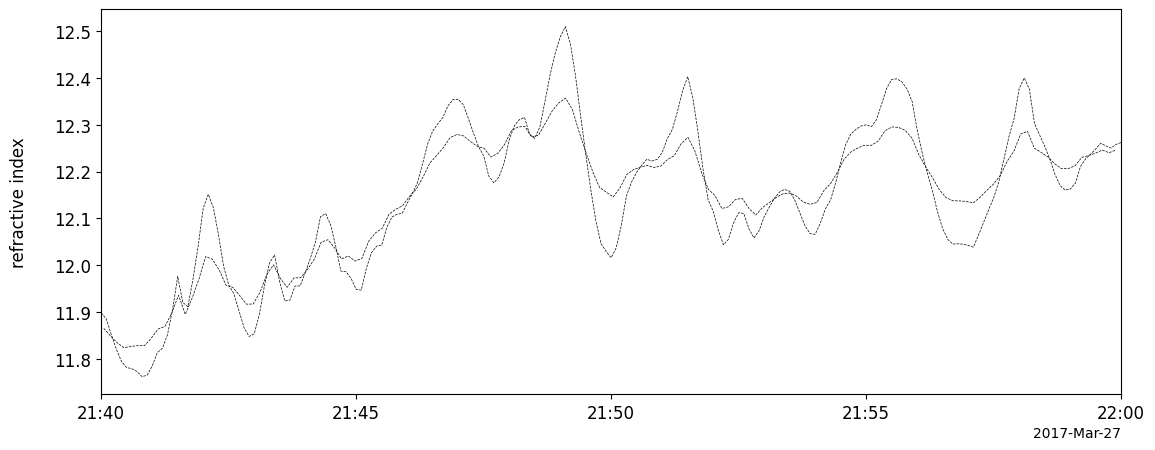

In [165]:
pytplot.xlim('2017-03-27 21:40:00', '2017-03-27 22:00:00')
pytplot.tplot(['mu_320mix'])

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import plasma_params as pp
from matplotlib.colors import rgb2hex

def calc_duct_range(f):
    N = 2e6
    B = 130e-9
    theta_stnd = 11.5*np.pi/180
    fc = (pp.Q*B/pp.ME)/2/np.pi
    fp = ((pp.Q**2*N)/(pp.EPS*pp.ME))**(1/2)/2/np.pi
    
    B0 = []  # Initialize an empty list to store the results
    #mu0 = []

    for freq in f:
        AA = fc*np.cos(theta_stnd)/freq
        BB = (AA-1)*pp.C**2
        k_sqr = 4*(np.pi**2)*(fp**2)/BB
        k = np.sqrt(k_sqr)
        k_para = k*np.cos(theta_stnd)

        theta = 0
        CC=2*np.pi*freq*pp.ME/pp.Q
        DD = N*pp.MYU*pp.Q**2/pp.ME
        k_perp = k_para*np.tan(theta)
        EE = k_para*np.sqrt(k_para**2+k_perp**2)
        FF = k_para**2+k_perp**2
        B = CC*(DD+FF)/EE*1e9
        theta = theta*180/np.pi
        
        #mu = cr.calc_RI(N, B, f)

        B0.append(B)  # Append the calculated value to the list
        #mu0.append(mu)
        
    return B0

l = [256, 320, 384, 448, 512, 576, 640, 704, 768, 832]
B0 = calc_duct_range(l)


In [154]:
B0

[134.81792475913858,
 134.67410202455767,
 134.5302792899767,
 134.38645655539582,
 134.24263382081486,
 134.09881108623395,
 133.95498835165304,
 133.81116561707208,
 133.6673428824911,
 133.52352014791023]

In [155]:
N = 2e6
f= [320, 384, 448]
mu0 = []
for i in range(len(B0)):    
    theta = 0
    fc = (pp.Q*B0[i]*1e-9/pp.ME)/2/np.pi
    fp = ((pp.Q**2*N)/(pp.EPS*pp.ME))**(1/2)/2/np.pi
    mu = fp*(fc*l[i]*(np.cos(theta)-(l[i]/fc)))**(-1/2)
    mu0.append(mu)

In [156]:
mu0

[13.337381537418837,
 12.046515079426857,
 11.107116905969885,
 10.388350861729677,
 9.818860317611856,
 9.356015781042073,
 8.972596789777915,
 8.650316746825307,
 8.376390272780743,
 8.141586659887711]

In [157]:
mu0

[13.337381537418837,
 12.046515079426857,
 11.107116905969885,
 10.388350861729677,
 9.818860317611856,
 9.356015781042073,
 8.972596789777915,
 8.650316746825307,
 8.376390272780743,
 8.141586659887711]

In [158]:
pytplot.cdf_to_tplot('./erg_data/satellite/erg/pwe/ofa/l3/property/2017/03/erg_pwe_ofa_l3_property_dsi_20170327_v01_03.cdf')

11-Sep-23 15:46:36: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



['epoch_e132',
 'E_spectra_132',
 'quality_flag_e132',
 'epoch_b132',
 'B_spectra_132',
 'quality_flag_b132',
 'kvec_polar_132',
 'kvec_azimuth_132',
 'polarization_132',
 'planarity_132',
 'kvec_polar_masked_132',
 'kvec_azimuth_masked_132',
 'polarization_masked_132',
 'planarity_masked_132',
 'epoch_p132',
 'Pvec_angle_132',
 'Pvec_angle_masked_132']

In [159]:
wna128 = pytplot.data_quants['kvec_polar_132'][:,1]
wna192 = pytplot.data_quants['kvec_polar_132'][:,2]
wna256 = pytplot.data_quants['kvec_polar_132'][:,3]
wna320 = pytplot.data_quants['kvec_polar_132'][:,4]
wna384 = pytplot.data_quants['kvec_polar_132'][:,5]
wna448 = pytplot.data_quants['kvec_polar_132'][:,6]
wna512 = pytplot.data_quants['kvec_polar_132'][:,7]
wna576 = pytplot.data_quants['kvec_polar_132'][:,8]
wna640 = pytplot.data_quants['kvec_polar_132'][:,9]
wna704 = pytplot.data_quants['kvec_polar_132'][:,10]
wna768 = pytplot.data_quants['kvec_polar_132'][:,11]
wna832 = pytplot.data_quants['kvec_polar_132'][:,12]

In [160]:
pytplot.store_data('wna128', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna128})
pytplot.store_data('wna192', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna192})
pytplot.store_data('wna256', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna256})
pytplot.store_data('wna320', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna320})
pytplot.store_data('wna384', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna384})
pytplot.store_data('wna448', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna448})
pytplot.store_data('wna512', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna512})
pytplot.store_data('wna576', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna576})
pytplot.store_data('wna640', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna640})
pytplot.store_data('wna704', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna704})
pytplot.store_data('wna768', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna768})
pytplot.store_data('wna832', data={'x':pytplot.data_quants['kvec_polar_132']['time'], 'y':wna832})

pytplot.options('wna128', opt_dict={'ytitle':'WNA 128Hz', 'ysubtitle':'[degree]', 'color':'red', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna192', opt_dict={'ytitle':'WNA 192Hz', 'ysubtitle':'[degree]', 'color':'green', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna256', opt_dict={'ytitle':'WNA 256Hz', 'ysubtitle':'[degree]', 'color':'blue', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna320', opt_dict={'ytitle':'WNA 320Hz', 'ysubtitle':'[degree]', 'color':'red', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna384', opt_dict={'ytitle':'WNA 384Hz', 'ysubtitle':'[degree]', 'color':'green', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna448', opt_dict={'ytitle':'WNA 448Hz', 'ysubtitle':'[degree]', 'color':'black', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna512', opt_dict={'ytitle':'WNA 512Hz', 'ysubtitle':'[degree]', 'color':'orange', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna576', opt_dict={'ytitle':'WNA 576Hz', 'ysubtitle':'[degree]', 'color':'purple', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna640', opt_dict={'ytitle':'WNA 640Hz', 'ysubtitle':'[degree]', 'color':'brown', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna704', opt_dict={'ytitle':'WNA 704Hz', 'ysubtitle':'[degree]', 'color':'pink', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna768', opt_dict={'ytitle':'WNA 768Hz', 'ysubtitle':'[degree]', 'color':'gray', 'ylog':0, 'yrange':[0, 30]})
pytplot.options('wna832', opt_dict={'ytitle':'WNA 832Hz', 'ysubtitle':'[degree]', 'color':'cyan', 'ylog':0, 'yrange':[0, 30]})


In [161]:
line320 = np.zeros(len(wna320))
line384 = np.zeros(len(wna384))
line448 = np.zeros(len(wna448))
line512 = np.zeros(len(wna512))
line576 = np.zeros(len(wna576))
line640 = np.zeros(len(wna640))
line704 = np.zeros(len(wna704))
line768 = np.zeros(len(wna768))
line832 = np.zeros(len(wna832))
line320[:] = mu0[1]
line384[:] = mu0[2]
line448[:] = mu0[3]
line512[:] = mu0[4]
line576[:] = mu0[5]
line640[:] = mu0[6]
line704[:] = mu0[7]
line768[:] = mu0[8]
line832[:] = mu0[9]
#pytplot.store_data('line256', data={'x':pytplot.data_quants['wna256']['time'], 'y':line256})
pytplot.store_data('line320', data={'x':pytplot.data_quants['wna320']['time'], 'y':line320})
pytplot.store_data('line384', data={'x':pytplot.data_quants['wna384']['time'], 'y':line384})
pytplot.store_data('line448', data={'x':pytplot.data_quants['wna448']['time'], 'y':line448})
pytplot.store_data('line512', data={'x':pytplot.data_quants['wna512']['time'], 'y':line512})
pytplot.store_data('line576', data={'x':pytplot.data_quants['wna576']['time'], 'y':line576})
pytplot.store_data('line640', data={'x':pytplot.data_quants['wna640']['time'], 'y':line640})
pytplot.store_data('line704', data={'x':pytplot.data_quants['wna704']['time'], 'y':line704})
pytplot.store_data('line768', data={'x':pytplot.data_quants['wna768']['time'], 'y':line768})
pytplot.store_data('line832', data={'x':pytplot.data_quants['wna832']['time'], 'y':line832})
#pytplot.options('line256', opt_dict={'color':'blue', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line320', opt_dict={'color':'red', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line384', opt_dict={'color':'green', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line448', opt_dict={'color':'black', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line512', opt_dict={'color':'orange', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line576', opt_dict={'color':'purple', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line640', opt_dict={'color':'brown', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line704', opt_dict={'color':'pink', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line768', opt_dict={'color':'gray', 'ylog':0, 'line_style':'--', 'thick':1})
pytplot.options('line832', opt_dict={'color':'cyan', 'ylog':0, 'line_style':'--', 'thick':1})



In [166]:
#pytplot.store_data('mix256', data=['mu_04','line256','mu_04'])
pytplot.store_data('mix320', data=['mu_320','line320'])
pytplot.store_data('mix384', data=['mu_384','line384'])
pytplot.store_data('mix448', data=['mu_448','line448'])
""" pytplot.store_data('mix512', data=['mu_04','line512'])
pytplot.store_data('mix576', data=['mu_04','line576'])
pytplot.store_data('mix640', data=['mu_04','line640'])
pytplot.store_data('mix704', data=['mu_04','line704'])
pytplot.store_data('mix768', data=['mu_04','line768'])
pytplot.store_data('mix832', data=['mu_04','line832']) """

pytplot.options('mix320', opt_dict={'color':'red'})
pytplot.options('mix384', opt_dict={'color':'green'})
pytplot.options('mix448', opt_dict={'color':'black'})


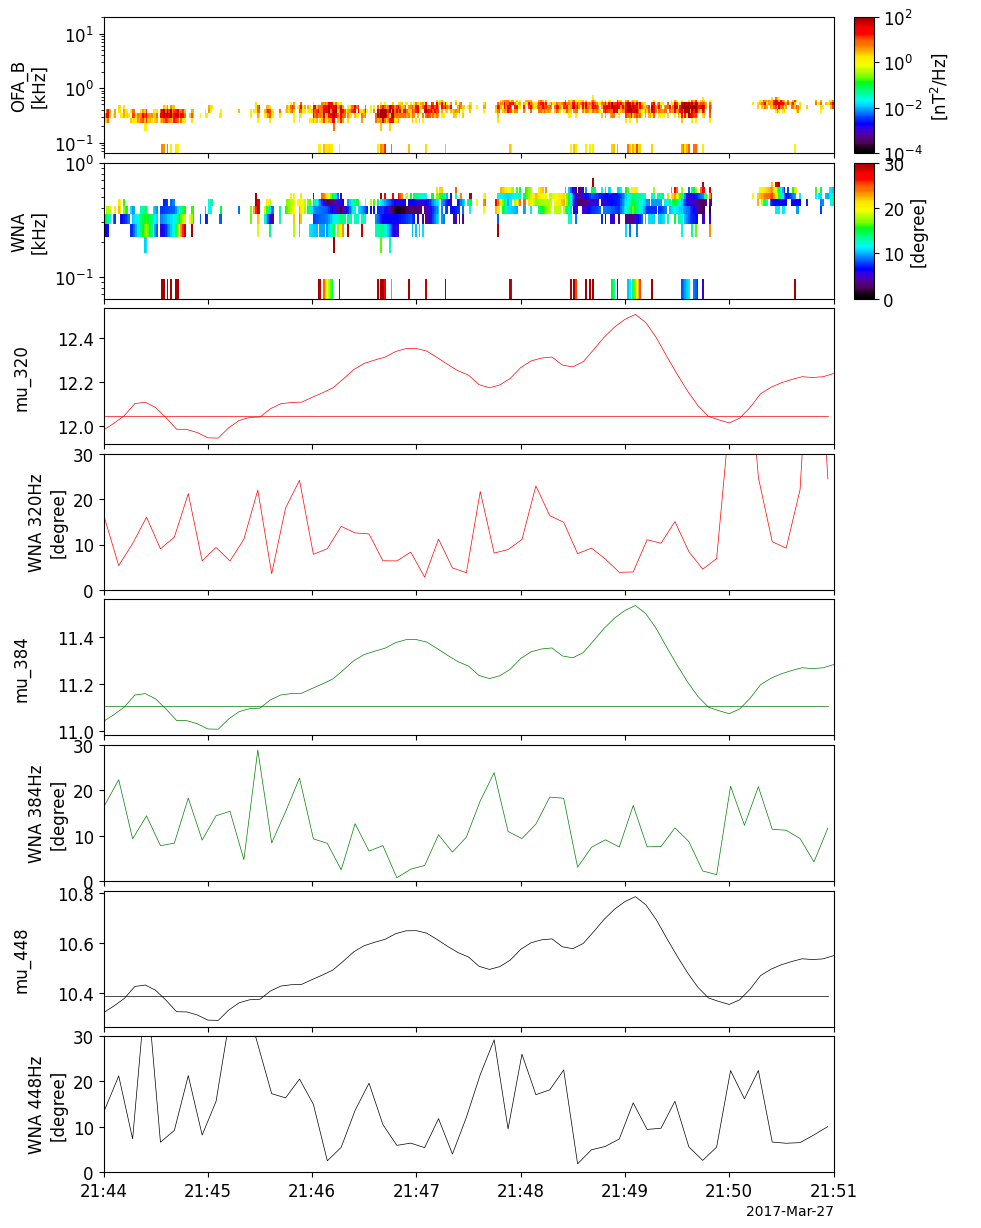

In [167]:
#pytplot.xlim('2017-03-27 21:40:00', '2017-03-27 22:00:00')
pytplot.xlim('2017-03-27 21:44:00', '2017-03-27 21:51:00')

pytplot.tplot(['B_mask_add','wna_mask_add','mix320', 'wna320','mix384', 'wna384', 'mix448', 'wna448'],xsize=10, ysize=15)

In [130]:
from pyspedas.erg import pwe_ofa
pwe_ofa(trange=['2017-03-27', '2017-03-28'])

11-Sep-23 15:44:49: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/
11-Sep-23 15:44:49: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170327_v02_03.cdf
11-Sep-23 15:44:50: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


['erg_pwe_ofa_l2_spec_epoch_e132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_e132',
 'erg_pwe_ofa_l2_spec_epoch_b132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_quality_flag_b132']

In [33]:
import mask_data as md

md.mask_data('erg_pwe_ofa_l2_spec_B_spectra_132', 'kvec_polar_132',1 )

11-Sep-23 15:21:35: tinterpol (linear) was applied to: wna_intrp


('B_mask_add', 'wna_mask_add')

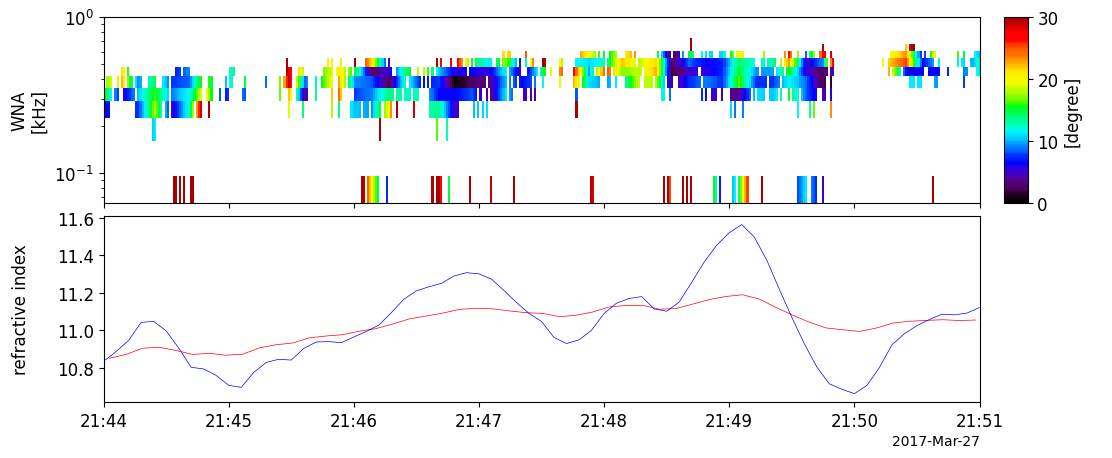

In [49]:
pytplot.tplot(['wna_mask_add', 'mu_04'])

In [32]:
pytplot.options('mu_all', opt_dict={'legend_names': [str(beta[i]) for i in range(len(beta))], 'color': ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'r', 'g'], 'ylog':1})

NameError: name 'beta' is not defined

11-Sep-23 14:44:28: The name mu_4 is currently not in pytplot
11-Sep-23 14:44:28: The name mu_4 is currently not in pytplot
11-Sep-23 14:44:28: Variable not found: mu_4


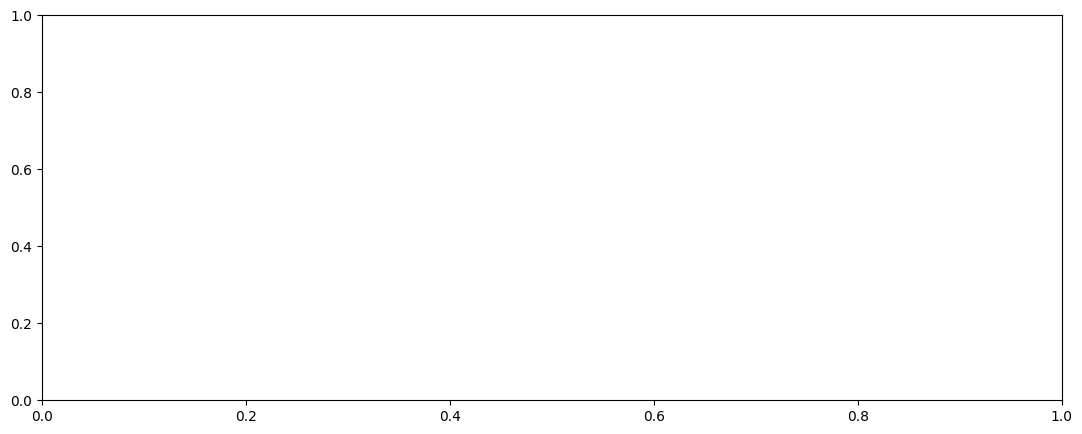

In [33]:
pytplot.xlim(tr[0], tr[1])
pytplot.tplot(['mu_4'])

In [66]:
download_trange = ['2017-03-27', '2013-03-28']

'ne_mgf',\
    'kvec_polar_132',\
        'erg_pwe_ofa_l2_spec_B_spectra_132','erg_pwe_ofa_l2_spec_E_spectra_132',\
        'erg_mepe_l2_omniflux_FEDO',\
        'erg_mepe_l3_pa_FEDU_87.5keV', 'erg_mepe_l3_pa_FEDU_72.6keV', 'erg_mepe_l3_pa_FEDU_60.4keV','erg_mepe_l3_pa_FEDU_50.3keV', 'erg_mepe_l3_pa_FEDU_42.0keV','erg_mepe_l3_pa_FEDU_35.0keV','erg_mepe_l3_pa_FEDU_29.3keV','erg_mepe_l3_pa_FEDU_24.5keV','erg_mepe_l3_pa_FEDU_20.5keV','erg_mepe_l3_pa_FEDU_17.1keV','erg_mepe_l3_pa_FEDU_14.3keV','erg_mepe_l3_pa_FEDU_12.0keV',\
            'delta_z', 'erg_mgf_l2_magt_8sec','erg_mgf_l2_mag_8sec_MAF_x&y',\
            'erg_orb_l2_pos_rmlatmlt','erg_orb_l2_pos_eq' == udp2.ULF_duct_load(download_trange)

14-Jul-23 13:47:50: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/
14-Jul-23 13:47:50: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170327_v02_03.cdf
14-Jul-23 13:47:51: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


14-Jul-23 13:47:52: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mgf/l2/8sec/2017/03/
14-Jul-23 13:47:52: File is current: erg_data/satellite/erg/mgf/l2/8sec/2017/03/erg_mgf_l2_8sec_20170327_v03.04.cdf
14-Jul-23 13:47:53: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data

Information about ERG MGF

PI:  Ayako Matsuoka
Affiliation: Data Analysis Center for Geomagnetism and Space Magnetism, Graduate School of Science, Kyoto University, Kitashirakawa-Oiwake Cho, Sakyo-ku Kyoto 606-8502, Japan

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of MGF L2: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mgf
Contact: erg_mgf_info at isee.nagoya-u.ac.jp
**************************************************************************


14-Jul-23 13:47:53: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf
14-Jul-23 13:47:53: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

14-Jul-23 13:47:53: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:316: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ydata[ydata == var_atts["FILLVAL"]] = 0



 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
**************************************************************************


14-Jul-23 13:48:04: tinterpol (linear) was applied to: cos_th_intpl
14-Jul-23 13:48:04: tinterpol (linear) was applied to: sin_th_intpl
14-Jul-23 13:48:04: tinterpol (linear) was applied to: cos_ph_intpl
14-Jul-23 13:48:04: tinterpol (linear) was applied to: sin_ph_intpl
14-Jul-23 13:48:04: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_x_intpl
14-Jul-23 13:48:04: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_y_intpl
14-Jul-23 13:48:04: tinterpol (linear) was applied to: erg_mgf_l2_mag_8sec_gsm_z_intpl


14-Jul-23 13:48:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/mepe/l2/omniflux/2017/03/
14-Jul-23 13:48:22: File is current: erg_data/satellite/erg/mepe/l2/omniflux/2017/03/erg_mepe_l2_omniflux_20170327_v01_02.cdf
14-Jul-23 13:48:22: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:310: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

14-Jul-23 13:48:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/orb/def/2017/
14-Jul-23 13:48:22: File is current: erg_data/satellite/erg/orb/def/2017/erg_orb_l2_20170327_v03.cdf


 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Medium Energy Particle experiments - electron analyzer (MEP-e) electron omni flux data

PI:  Satoshi Kasahara
Affiliation: The University of Tokyo

- The rules of the road (RoR) common to the ERG project:
      https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
- RoR for MEP-e data:  https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Mepe

Contact: erg_mep_info at isee.nagoya-u.ac.jp
**************************************************************************
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Level-2 orbit data

Information about ERG orbit


RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en

Contact: erg-sc-core at isee.nagoya-u.ac.jp
************************************************

('ne_mgf',
 'kvec_polar_132',
 'erg_pwe_ofa_l2_spec_B_spectra_132',
 'erg_pwe_ofa_l2_spec_E_spectra_132',
 'erg_mepe_l2_omniflux_FEDO',
 'erg_mepe_l3_pa_FEDU_87.5keV',
 'erg_mepe_l3_pa_FEDU_72.6keV',
 'erg_mepe_l3_pa_FEDU_60.4keV',
 'erg_mepe_l3_pa_FEDU_50.3keV',
 'erg_mepe_l3_pa_FEDU_42.0keV',
 'erg_mepe_l3_pa_FEDU_35.0keV',
 'erg_mepe_l3_pa_FEDU_29.3keV',
 'erg_mepe_l3_pa_FEDU_24.5keV',
 'erg_mepe_l3_pa_FEDU_20.5keV',
 'erg_mepe_l3_pa_FEDU_17.1keV',
 'erg_mepe_l3_pa_FEDU_14.3keV',
 'erg_mepe_l3_pa_FEDU_12.0keV',
 'delta_z',
 'erg_mgf_l2_magt_8sec',
 'erg_mgf_l2_mag_8sec_MAF_x&y',
 'erg_orb_l2_pos_rmlatmlt',
 False)

In [67]:
import get_density as gd
import calc_RI as cr
import pytplot
import pyspedas
import numpy as np


r2 = ['2017-03-27 21:30:00', '2017-03-27 22:00:00']
min = 0.1
max = 20
'erg_pwe_ofa_l2_spec_B_chorus_integrate' == cic.integral_chorus_spec(download_trange,r2, min, max)

f = 0.4e3
path = './erg_data/satellite/erg/UHRdensity/2017/03/density20170327.txt'
theta = 0
plot_trange = r2
'ne' == gd.get_density(path)

pyspedas.tinterpol('ne', 'erg_mgf_l2_magt_8sec', newname='ne_intpl')
N=2*10**6
#N = pytplot.data_quants['ne_intpl']*1e6
B = pytplot.data_quants['erg_mgf_l2_magt_8sec']*1e-9

mu = cr.calc_RI(N, B, f)
pytplot.store_data('mu', data={'x':B['time'], 'y':mu})
pytplot.options('kvec_polar_132', opt_dict={'ytitle':'wna','ysubtitle':'[kHz]','ylog':1, 'spec':1})
pytplot.options('erg_pwe_ofa_l2_spec_B_spectra_132', opt_dict={'ytitle':'ofa-B','ysubtitle':'[kHz]','ylog':1, 'zlog':1, 'spec':1})
pytplot.options('erg_pwe_ofa_l2_spec_B_chorus_integrate', opt_dict={'ytitle':'chorus intensity', 'ysubtitle':'[$pT^2$]','ylog':1})
pytplot.options('delta_z', opt_dict={'ytitle':'$\delta B$','ylog':0})
pytplot.options('erg_mgf_l2_magt_8sec', opt_dict={'ytitle':'$B_{total}$','ylog':0})
pytplot.options('erg_mgf_l2_mag_8sec_MAF_x&y', opt_dict={'ytitle':'$B_{xy}$','ylog':0})
pytplot.options('mu', opt_dict={'ytitle':'$\mu$','ylog':1})
plot_trange = r2
labels = pytplot.split_vec( 'erg_orb_l2_pos_rmlatmlt' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_x', opt_dict={'ytitle':'L [Re]','ytitle_location':'left'} )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_y', 'ytitle', 'MLat [deg]' )
pytplot.options( 'erg_orb_l2_pos_rmlatmlt_z', 'ytitle', 'MLT [h]' )
pytplot.options('ne', opt_dict={'ytitle':'density','ylog':0, 'yrange':[1e-1, 5e-1]})
pytplot.xlim( plot_trange[0], plot_trange[1] )



14-Jul-23 13:48:22: <>:29: DeprecationWarning: invalid escape sequence '\d'

14-Jul-23 13:48:22: <>:32: DeprecationWarning: invalid escape sequence '\m'

14-Jul-23 13:48:22: <>:29: DeprecationWarning: invalid escape sequence '\d'

14-Jul-23 13:48:22: <>:32: DeprecationWarning: invalid escape sequence '\m'

14-Jul-23 13:48:22: /tmp/ipykernel_17370/969299413.py:29: DeprecationWarning: invalid escape sequence '\d'
  pytplot.options('delta_z', opt_dict={'ytitle':'$\delta B$','ylog':0})

14-Jul-23 13:48:22: /tmp/ipykernel_17370/969299413.py:32: DeprecationWarning: invalid escape sequence '\m'
  pytplot.options('mu', opt_dict={'ytitle':'$\mu$','ylog':1})

14-Jul-23 13:48:22: Downloading remote index: https://ergsc.isee.nagoya-u.ac.jp/data/ergsc/satellite/erg/pwe/ofa/l2/spec/2017/03/
14-Jul-23 13:48:22: File is current: erg_data/satellite/erg/pwe/ofa/l2/spec/2017/03/erg_pwe_ofa_l2_spec_20170327_v02_03.cdf
14-Jul-23 13:48:23: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-pac

 
 
**************************************************************************
Exploration of Energization and Radiation in Geospace (ERG) Plasma Wave Experiment (PWE) Onboard Frequency Analyzer (OFA) Level 2 spectrum data

Information about ERG PWE OFA

PI:  Yoshiya Kasahara
Affiliation: Kanazawa University

RoR of ERG project common: https://ergsc.isee.nagoya-u.ac.jp/data_info/rules_of_the_road.shtml.en
RoR of PWE/OFA: https://ergsc.isee.nagoya-u.ac.jp/mw/index.php/ErgSat/Pwe/Ofa

Contact: erg_pwe_info at isee.nagoya-u.ac.jp
**************************************************************************


14-Jul-23 13:52:09: tinterpol (linear) was applied to: ne_intpl
14-Jul-23 13:52:09: erg_mgf_l2_mag_8sec_MAF_x&y is currently not in pytplot.


In [68]:
N=2*10**6
#N = pytplot.data_quants['ne_intpl']*1e6
B = pytplot.data_quants['erg_mgf_l2_magt_8sec']*1e-9
f=400
mu = cr.calc_RI(N, B, f)
pytplot.store_data('mu', data={'x':B['time'], 'y':mu})
pytplot.options('mu', opt_dict={'ytitle':'$\mu$','ylog':1})


14-Jul-23 13:52:09: <>:7: DeprecationWarning: invalid escape sequence '\m'

14-Jul-23 13:52:09: <>:7: DeprecationWarning: invalid escape sequence '\m'

14-Jul-23 13:52:09: /tmp/ipykernel_17370/260264973.py:7: DeprecationWarning: invalid escape sequence '\m'
  pytplot.options('mu', opt_dict={'ytitle':'$\mu$','ylog':1})



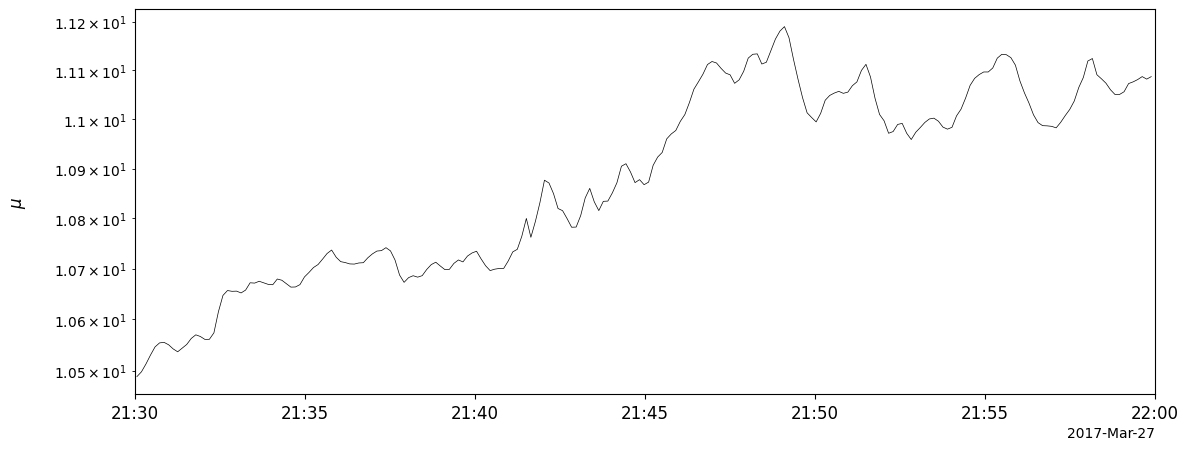

In [69]:
pytplot.tplot('mu')

14-Jul-23 13:52:09: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:423: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  xaxis_ticks_dt = [np.datetime64(mpl.dates.num2date(tick_val).isoformat()) for tick_val in xaxis_ticks]

14-Jul-23 13:52:09: /home/jackkooki/Document/duct_analysis/.venv/lib/python3.10/site-packages/pytplot/MPLPlotter/tplot.py:618: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  out_ticks.append('{:.2f}'.format(var_xr.interp(coords={'time': time}, kwargs=

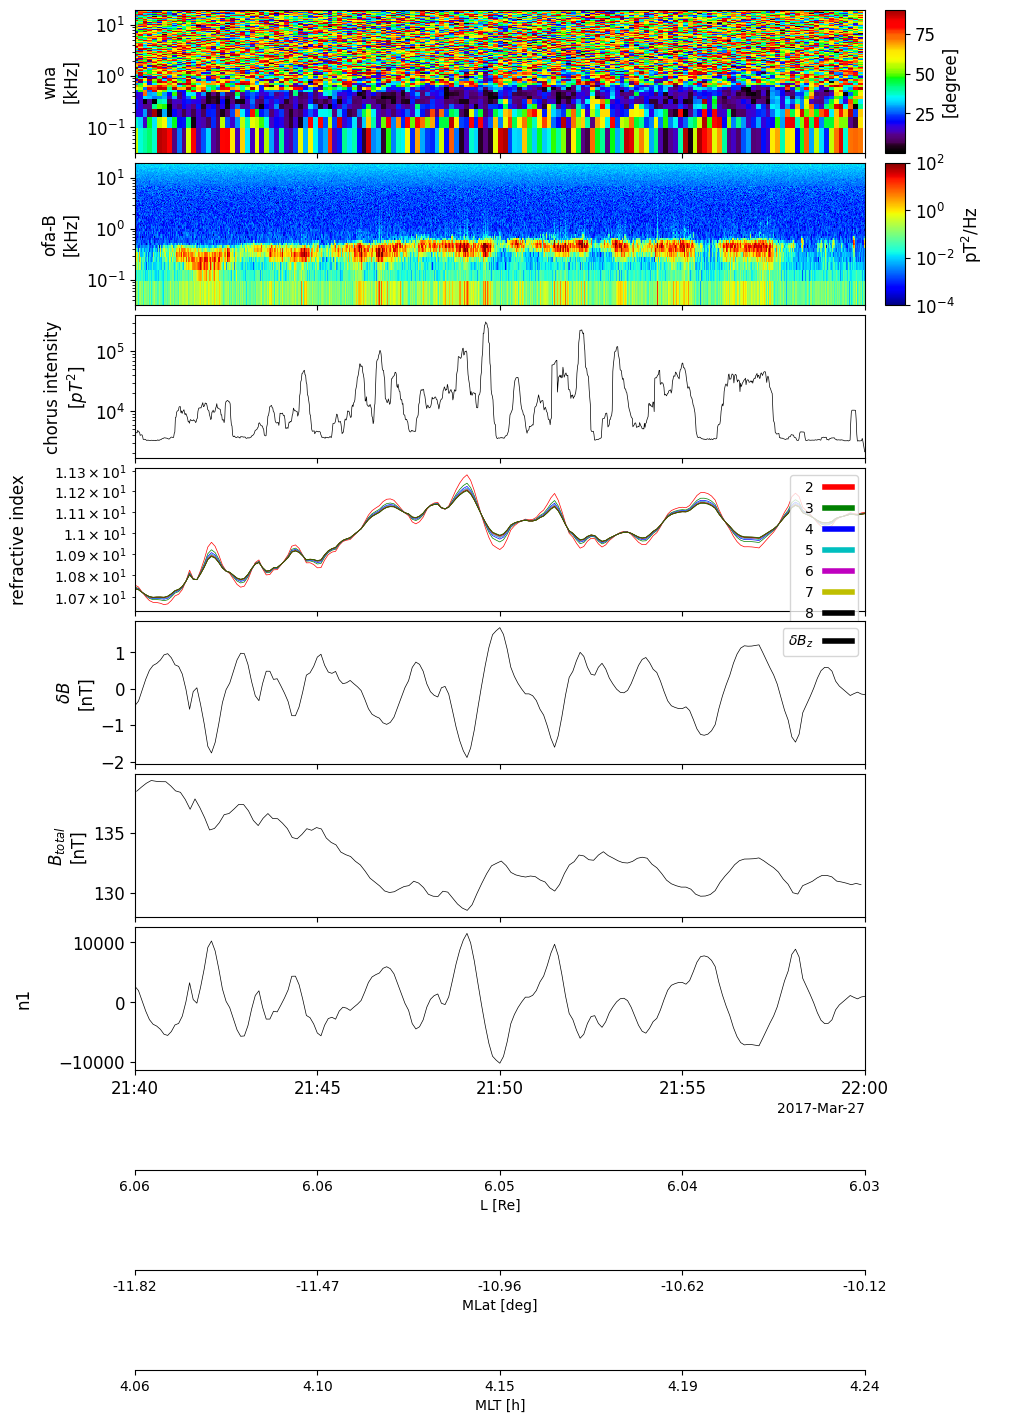

In [70]:
tr = ['2017-03-27 21:40:00', '2017-03-27 22:00:00']
pytplot.xlim(tr[0], tr[1])
pytplot.tplot(['kvec_polar_132', 'erg_pwe_ofa_l2_spec_B_spectra_132', 'erg_pwe_ofa_l2_spec_B_chorus_integrate', 'mu_all', 'delta_z', 'erg_mgf_l2_magt_8sec','n1'],var_label=labels, xsize=10, ysize=20)
